In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '/home/federico/Università/Tesi_magistrale/my_programs/')

from contact_matrix_utils import *
import settings
from src.slice_pairwise import *
from src.interchromosomal_cosegregation import *
from numpy.random import Generator, MT19937
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def chromosome_bin_lenght(segregation_table, chrom):
    return np.ceil(segregation_table[chrom]['stop_position'][-1]/resolution).astype(int)

def select_chromosomes_coordinates(chrA, chrB, chr_windows_sizes):
    if(chrA==0 or chrB ==0):
        print("0 is not accepted as chromosome index ")
        return

    chrA_idx, chrB_idx = chrA - 1, chrB - 1

    if(chrA_idx>chrB_idx):
        chrA_idx, chrB_idx = chrB_idx, chrA_idx

    start_row    = np.sum(chr_windows_sizes[:chrA_idx])
    stop_row     = start_row + chr_windows_sizes[chrA_idx]
    start_column = np.sum(chr_windows_sizes[:chrB_idx])
    stop_column  = start_column + chr_windows_sizes[chrB_idx]

    return start_row, stop_row, start_column, stop_column

which_beta = "$\\beta$ evaluated | 1/2"

# segregation table import #

In [3]:
name_root_dopa_150kb = "dopa30_150kb_482x3"

if(name_root_dopa_150kb!= settings.name_root):
    raise ValueError("Change name_root in settings.py and then restart the notebook")

path_2 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_dopa_150kb + "/"
file_name_2 = "segregation_" + name_root_dopa_150kb +  ".pkl"
with open(path_2 + file_name_2, 'rb') as f:
    segregation_table_dopa_150kb = pickle.load(f)

start_chr, stop_chr = 1, 19
stop_chr += 1
chromosomes = []
n_chromosomes = stop_chr - start_chr

l = []
size = 0

for i in range(start_chr, stop_chr):
    chrA = 'chr' + str(i)
    chromosomes += [chrA]
    s = segregation_table_dopa_150kb[chrA]['segregation_table'].shape[0]
    size += s
    l.append(s) 

chr_windows_sizes = np.array(l)


# Statistics of $\pi$ in chr12 and 18 #

nan percentage in cosegregation

la percentuale dei nan nelle pi è esattamente corrispondente alla percentuale di nan nelle coseg, l'unica cosa a cui porre attenzione è che questa percentuale viene calcolata sulle squareform i.e. escludendo totalmente la diagonale

## Cosegregations of chr12 and chr18 ##

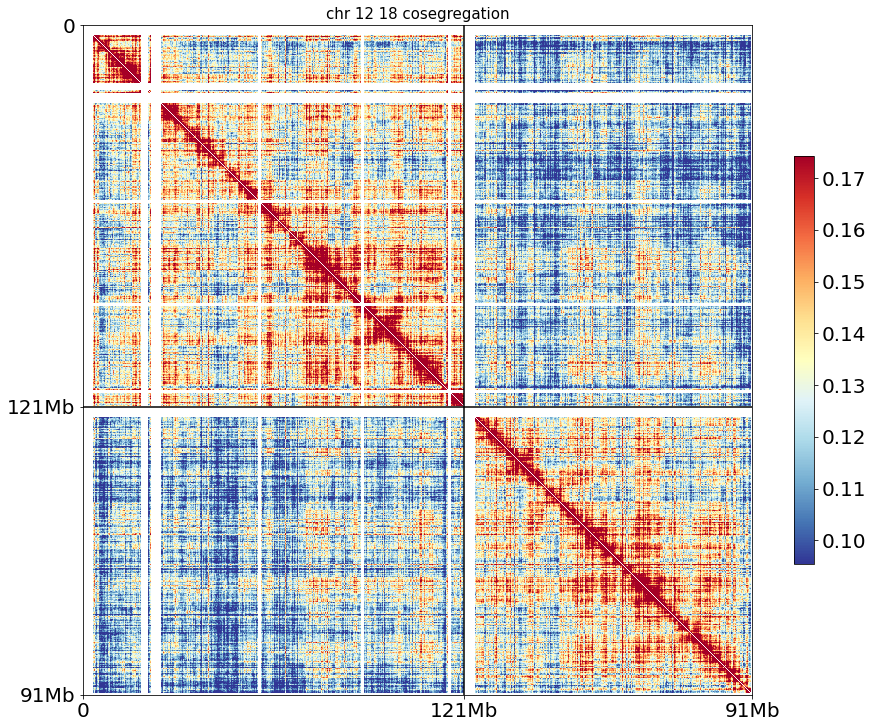

In [4]:
chr12_dopa_150kb_coseg = compute_tube_cosegregation_matrix(segregation_table_dopa_150kb['chr12']['segregation_table'])
chr18_dopa_150kb_coseg = compute_tube_cosegregation_matrix(segregation_table_dopa_150kb['chr18']['segregation_table'])
chr12_18_dopa_150kb_coseg = compute_tube_cosegregation_matrix_offdiag(segregation_table_dopa_150kb['chr12']['segregation_table'], segregation_table_dopa_150kb['chr18']['segregation_table'])

chr12_dopa_150kb_coseg[chr12_dopa_150kb_coseg == 0] = np.nan
chr18_dopa_150kb_coseg[chr18_dopa_150kb_coseg == 0] = np.nan
chr12_18_dopa_150kb_coseg[chr12_18_dopa_150kb_coseg == 0] = np.nan

plot_heatmap_two_chromosomes(chr12_dopa_150kb_coseg, chr18_dopa_150kb_coseg, chr12_18_dopa_150kb_coseg, colormap = "RdYlBu_r", title = "chr 12 18 cosegregation", resolution=150E3);


/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/src/utilities.py:40: RuntimeWarning: divide by zero encountered in log
  npmi_mat = - np.log(F_ij / (F_i * F_j)) / np.log(F_ij)
/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/src/utilities.py:56: RuntimeWarning: divide by zero encountered in log
  npmi_mat = - np.log(F_ij / (F_i * F_j)) / np.log(F_ij)


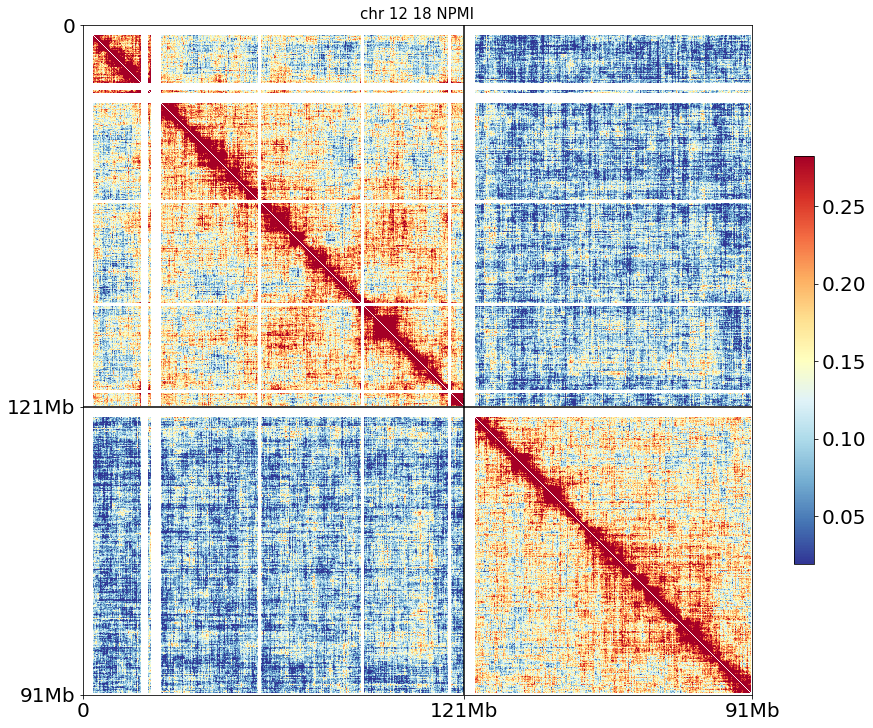

In [5]:
chr12_dopa_150kb_npmi = compute_npmi(segregation_table_dopa_150kb['chr12']['segregation_table'])
chr18_dopa_150kb_npmi = compute_npmi(segregation_table_dopa_150kb['chr18']['segregation_table'])
chr12_18_dopa_150kb_npmi = compute_npmi_inter(segregation_table_dopa_150kb['chr12']['segregation_table'], segregation_table_dopa_150kb['chr18']['segregation_table'])


plot_heatmap_two_chromosomes(chr12_dopa_150kb_npmi, chr18_dopa_150kb_npmi, chr12_18_dopa_150kb_npmi, colormap = "RdYlBu_r", title = "chr 12 18 NPMI", resolution=150E3);

## intra ##

In [6]:
from src.slice_pairwise import single_chromosome

### chromosome 12 ###

chromosome 12 dopa 150kb, seed =  351384 :


Computing PIs for chr12 ...
% of NaN PI values: 18.538389513108612 %
% of PI < 0 (out of non-nans): 51.08523656816205 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 7.373095328406187 %
Mean PI value: 0.06274615637608949
STD PI value: 0.04909501250280613
Mean SIGNIFICATIVE PI value: 0.1507065086612466
STD SIGNIFICATIVE PI value: 0.039329464071905185
Done

Absolute percentage of zeros:  41.614856429463174
Absolute percentage of significative:  6.0062421972534334


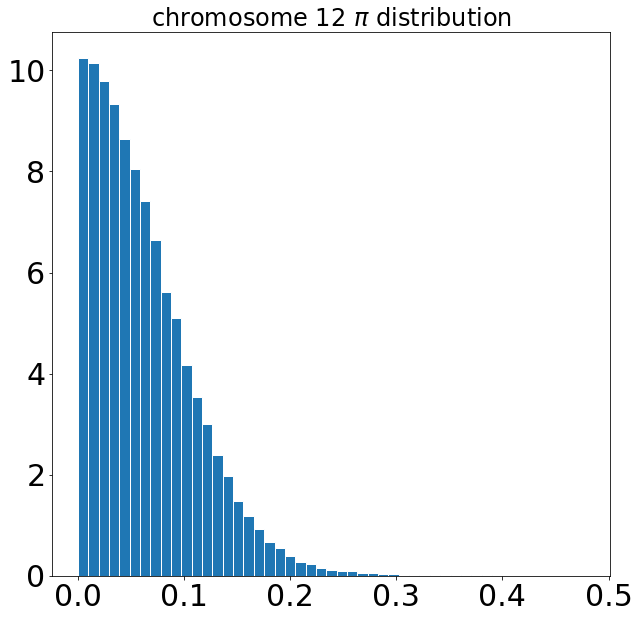

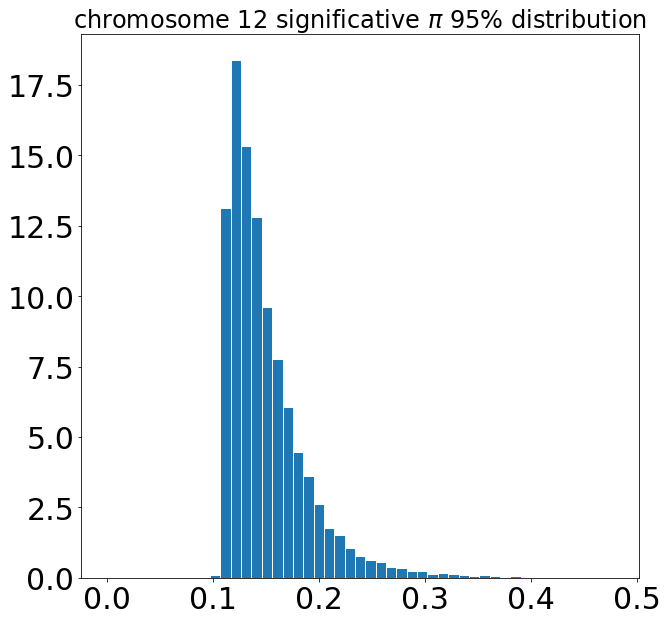

In [7]:
s = 351384
rg = Generator(MT19937(s))
print("chromosome 12 dopa 150kb, seed = ", s , ":\n")


chr12_dopa_150kb_pi, chr12_dopa_150kb_sign_pi = single_chromosome('chr12', segregation_table_dopa_150kb['chr12']['segregation_table'],  95, verbose= True, save= False, ret= True, generator = rg)

del rg, s

print( "Absolute percentage of zeros: ", (1 - 0.18538389513108612) * 0.5108523656816205 * 100)
print( "Absolute percentage of significative: ", (1 - 0.18538389513108612) * 0.07373095328406187 * 100)

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr12_dopa_150kb_pi.flatten(), bins = np.linspace(0,np.nanmax(chr12_dopa_150kb_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 12 $\pi$ distribution", fontsize = 24);

del fig, ax

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr12_dopa_150kb_sign_pi.flatten(), bins = np.linspace(0,np.nanmax(chr12_dopa_150kb_sign_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 12 significative $\pi$ 95% distribution", fontsize = 24);

del fig, ax

### chromosome 18 ###

chromosome 18 dopa 150kb, seed =  1354312 :


Computing PIs for chr18 ...
% of NaN PI values: 8.417163811504565 %
% of PI < 0 (out of non-nans): 50.65767849352481 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 5.998290812820099 %
Mean PI value: 0.0594621368072742
STD PI value: 0.0472818080897773
Mean SIGNIFICATIVE PI value: 0.15201851312465184
STD SIGNIFICATIVE PI value: 0.042190123038074775
Done

Absolute percentage of zeros:  46.393738711619505
Absolute percentage of significative:  5.493404849214603


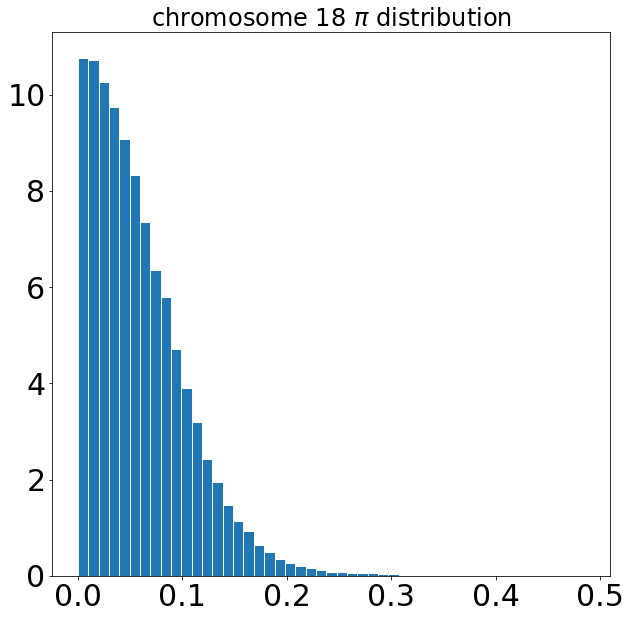

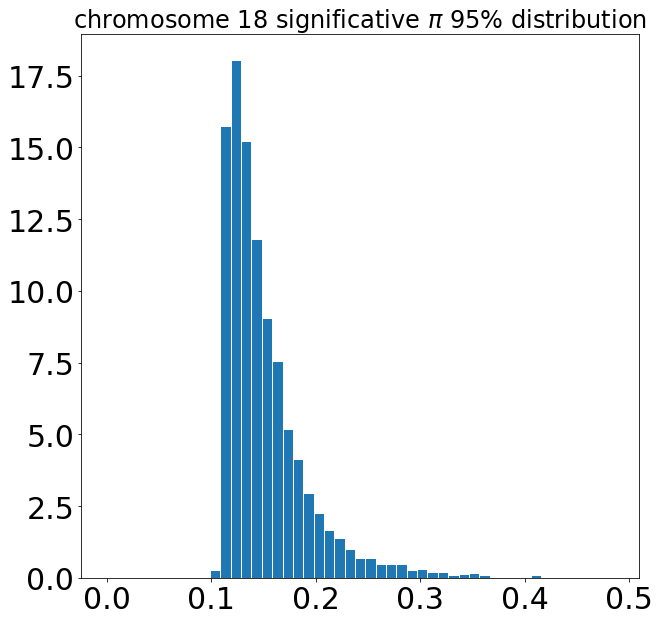

In [8]:
s = 1354312
rg = Generator(MT19937(s))

print("chromosome 18 dopa 150kb, seed = ", s , ":\n")

chr18_dopa_150kb_pi, chr18_dopa_150kb_sign_pi = single_chromosome('chr18', segregation_table_dopa_150kb['chr18']['segregation_table'],  95, verbose= True, save= False, ret= True, generator = rg)

print( "Absolute percentage of zeros: ", (1 - 0.08417163811504565) * 0.5065767849352481 * 100)
print( "Absolute percentage of significative: ", (1 - 0.08417163811504565) * 0.05998290812820099 * 100)

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr18_dopa_150kb_pi.flatten(), bins = np.linspace(0,np.nanmax(chr18_dopa_150kb_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 18 $\pi$ distribution", fontsize = 24);

del fig, ax

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr18_dopa_150kb_sign_pi.flatten(), bins = np.linspace(0,np.nanmax(chr18_dopa_150kb_sign_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 18 significative $\pi$ 95% distribution", fontsize = 24);

del fig, ax

### Pi heatmaps ###

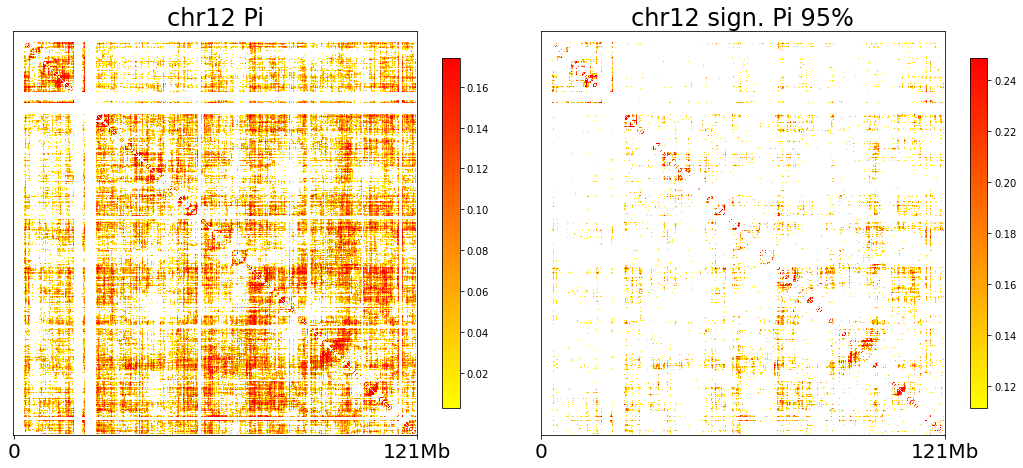

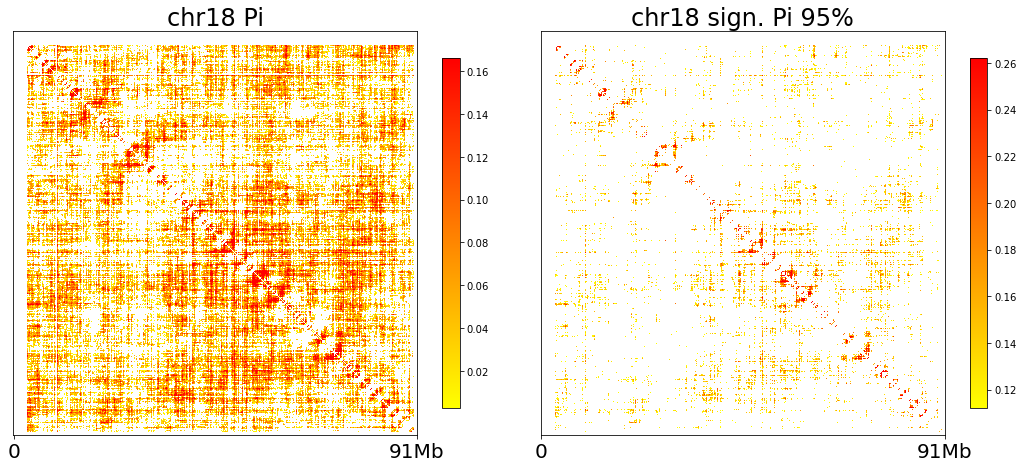

In [9]:
fig1, ax1 = plot_multiple_heatmaps(n_mats=2, mats=[chr12_dopa_150kb_pi, chr12_dopa_150kb_sign_pi], vmin = [np.nanpercentile(chr12_dopa_150kb_pi, 3), np.nanpercentile(chr12_dopa_150kb_sign_pi, 3)], vmax = [np.nanpercentile(chr12_dopa_150kb_pi, 97), np.nanpercentile(chr12_dopa_150kb_sign_pi, 97)], x_figsize=15, y_figsize=10, colormap="autumn_r");
chr12_ticks = [0, chr12_dopa_150kb_pi.shape[0]]
chr12_tick_labels = [0, str(int(np.ceil(chr12_dopa_150kb_pi.shape[0] * resolution / 1E6))) + "Mb"]
ax1[0].set_xticks(chr12_ticks)
ax1[0].set_yticks([])
ax1[0].set_xticklabels(chr12_tick_labels, fontsize = 20);
ax1[1].set_xticks(chr12_ticks)
ax1[1].set_yticks([])
ax1[1].set_xticklabels(chr12_tick_labels, fontsize = 20);

ax1[0].set_title("chr12 Pi", fontsize = 24);
ax1[1].set_title("chr12 sign. Pi 95%", fontsize = 24);


fig2, ax2 = plot_multiple_heatmaps(n_mats=2, mats=[chr18_dopa_150kb_pi, chr18_dopa_150kb_sign_pi], vmin = [np.nanpercentile(chr18_dopa_150kb_pi, 3), np.nanpercentile(chr18_dopa_150kb_sign_pi, 3)], vmax = [np.nanpercentile(chr18_dopa_150kb_pi, 97), np.nanpercentile(chr18_dopa_150kb_sign_pi, 97)], x_figsize=15, y_figsize=10, colormap="autumn_r");
chr18_ticks = [0, chr18_dopa_150kb_pi.shape[0]]
chr18_tick_labels = [0, str(int(np.ceil(chr18_dopa_150kb_pi.shape[0] * resolution / 1E6))) + "Mb"]
ax2[0].set_xticks(chr18_ticks)
ax2[0].set_yticks([])
ax2[0].set_xticklabels(chr18_tick_labels, fontsize = 20);
ax2[1].set_xticks(chr18_ticks)
ax2[1].set_yticks([])
ax2[1].set_xticklabels(chr18_tick_labels, fontsize = 20);

ax2[0].set_title("chr18 Pi", fontsize = 24);
ax2[1].set_title("chr18 sign. Pi 95%", fontsize = 24);

Questo di seguito è solo un test per calcolare le beta 

In [10]:
from src.slice_pairwise_inter_beta_evaluation import compute_s_mat_inter as compute_s_mat_inter_beta_eval

In [11]:
F_arr_A, F_arr_B = compute_tube_segregation_frequency_inter(segregation_table_dopa_150kb['chr12']['segregation_table'], segregation_table_dopa_150kb['chr18']['segregation_table'])
F_mat = compute_tube_cosegregation_matrix_offdiag(segregation_table_dopa_150kb['chr12']['segregation_table'], segregation_table_dopa_150kb['chr18']['segregation_table'])

F_mat[:, np.isnan(F_arr_B)] = np.nan
F_mat[np.isnan(F_arr_A), :] = np.nan

s_mat = compute_s_mat_inter_beta_eval(F_arr_A, F_arr_B, F_mat, effective_NPs_per_tube, F_mean)
print(np.nanmean(s_mat))

del F_arr_A, F_arr_B, F_mat, s_mat

2.5875275858058395


# $\beta$ evaluated # 

In [12]:
from src.slice_pairwise_inter_beta_evaluation import inter_chromosome as inter_chromosome_beta_eval

In [13]:
s = 75131
rg = Generator(MT19937(s))

print("chromosome 12 and 18 dopa 150kb", ", beta evaluated", ", seed = ", s , ":\n")

chr12_18_dopa_150kb_pi_beta_eval, chr12_18_dopa_150kb_sign_pi_beta_eval = inter_chromosome_beta_eval(segregation_table_dopa_150kb['chr12']['segregation_table'], segregation_table_dopa_150kb['chr18']['segregation_table'] , 'chr12', 'chr18', 95, verbose= True, save= False, ret= True, generator = rg)

print( "Absolute percentage of zeros in b = <s>: ", (1 - 0.13616863218497542) * 0.4941724774674702 * 100)
print( "Absolute percentage of significative in b = <s>: ", (1 - 0.13616863218497542) * 0.05863354808810918 * 100)


chromosome 12 and 18 dopa 150kb , beta evaluated , seed =  75131 :


Computing inter PIs for chr12 and chr18 ...
% of NaN PI values: 13.616863218497542 %
% of PI < 0 (out of non-nans): 49.41724774674702 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 5.863354808810918 %
Mean PI value: 0.0265889002665121
STD PI value: 0.019849846211299173
Mean SIGNIFICATIVE PI value: 0.06597553811495616
STD SIGNIFICATIVE PI value: 0.012031564299073937
beta: 2.5875275858058395
Done

Absolute percentage of zeros in b = <s>:  42.688168714726416
Absolute percentage of significative in b = <s>:  5.064949804479937


## Heatmaps ##

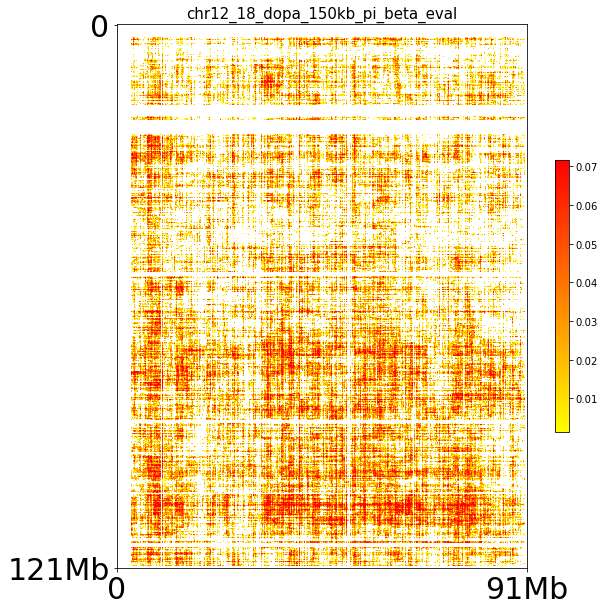

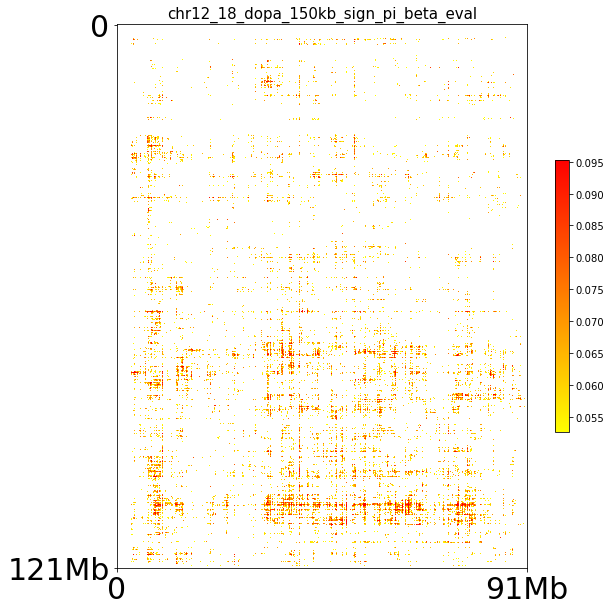

In [14]:
fig1, ax1, _, _ = plot_heatmap(chr12_18_dopa_150kb_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr12_18_dopa_150kb_pi_beta_eval", colormap="autumn_r");
fig2, ax2, _, _ = plot_heatmap(chr12_18_dopa_150kb_sign_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr12_18_dopa_150kb_sign_pi_beta_eval", colormap="autumn_r");

chr12_ticks = [0, chr12_dopa_150kb_pi.shape[0]]
chr12_tick_labels = [0, str(int(np.ceil(chr12_dopa_150kb_pi.shape[0] * resolution / 1E6))) + "Mb"]

chr18_ticks = [0, chr18_dopa_150kb_pi.shape[0]]
chr18_tick_labels = [0, str(int(np.ceil(chr18_dopa_150kb_pi.shape[0] * resolution / 1E6))) + "Mb"]

for i in [ ax1, ax2]:
    i.set_xticks(chr18_ticks)
    i.set_yticks(chr12_ticks)
    i.set_xticklabels(chr18_tick_labels, fontsize = 30);
    i.set_yticklabels(chr12_tick_labels, fontsize = 30);

del fig1, fig2, ax1, ax2, i


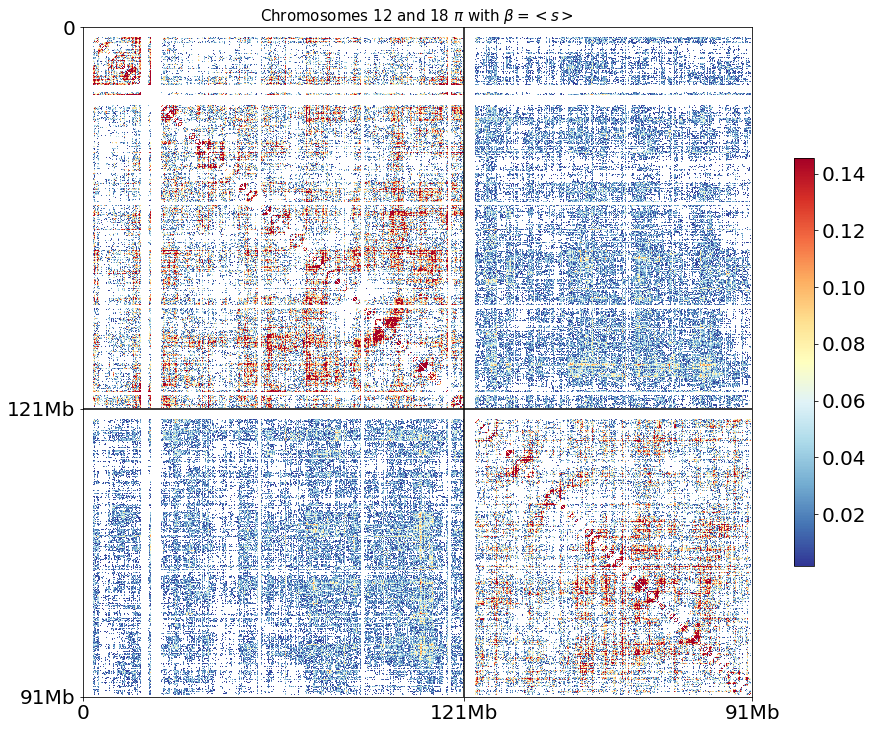

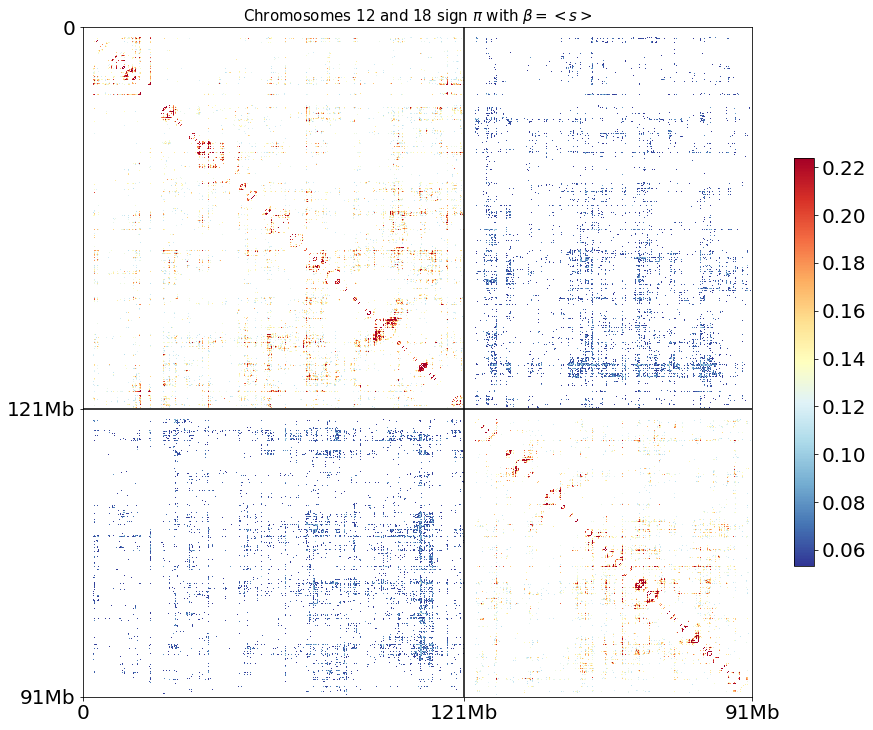

In [15]:
plot_heatmap_two_chromosomes(chr12_dopa_150kb_pi, chr18_dopa_150kb_pi, chr12_18_dopa_150kb_pi_beta_eval, title = "Chromosomes 12 and 18 $\pi$ with $\\beta = <s>$", resolution=resolution, colormap="RdYlBu_r");
plot_heatmap_two_chromosomes(chr12_dopa_150kb_sign_pi, chr18_dopa_150kb_sign_pi, chr12_18_dopa_150kb_sign_pi_beta_eval, title = "Chromosomes 12 and 18 sign $\pi$ with $\\beta = <s>$", resolution=resolution, colormap="RdYlBu_r");

## Histograms ##

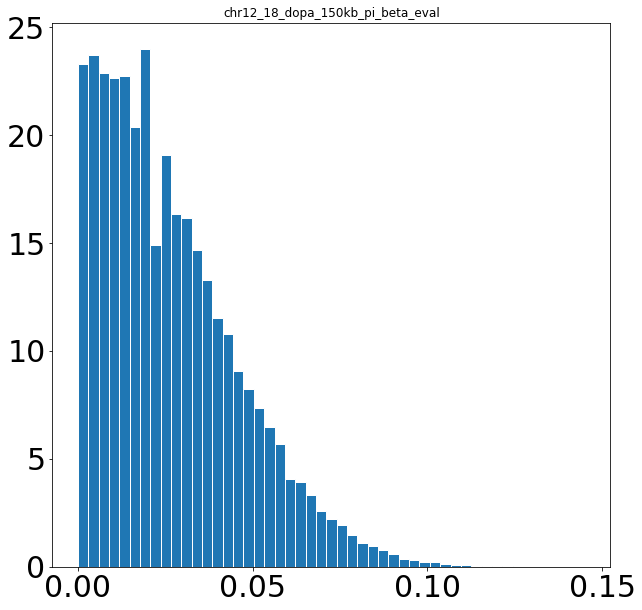

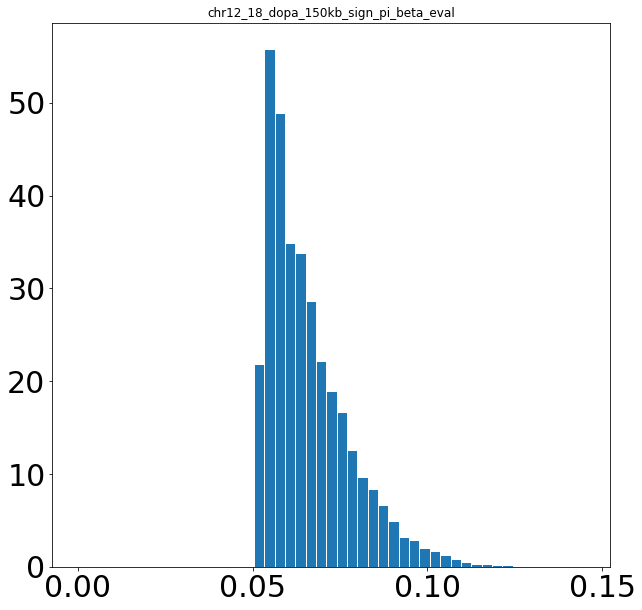

In [16]:
fig1, ax1 = plt.subplots(1, figsize = (10,10))
fig2, ax2 = plt.subplots(1, figsize = (10,10))


A = ax1.hist(chr12_18_dopa_150kb_pi_beta_eval.flatten(), bins = np.linspace(0,np.nanmax(chr12_18_dopa_150kb_pi_beta_eval), 50), edgecolor = "white", density = True)
ax1.set_title("chr12_18_dopa_150kb_pi_beta_eval")

B = ax2.hist(chr12_18_dopa_150kb_sign_pi_beta_eval.flatten(), bins = np.linspace(0,np.nanmax(chr12_18_dopa_150kb_pi_beta_eval), 50), edgecolor = "white", density = True)
ax2.set_title("chr12_18_dopa_150kb_sign_pi_beta_eval")

ax1.tick_params(axis='x', which='major', labelsize=30)
ax1.tick_params(axis='y', which='major', labelsize=30)
ax2.tick_params(axis='x', which='major', labelsize=30)
ax2.tick_params(axis='y', which='major', labelsize=30)


del A, B, fig1, fig2, ax1, ax2

## Stats ##

In [17]:
print( "chr12_18_dopa_150kb_pi_beta_eval:\t\t" , np.nanmean(chr12_18_dopa_150kb_pi_beta_eval),      np.nanstd(chr12_18_dopa_150kb_pi_beta_eval))
print( "chr12_18_dopa_150kb_sign_pi_beta_eval:\t" , np.nanmean(chr12_18_dopa_150kb_sign_pi_beta_eval), np.nanstd(chr12_18_dopa_150kb_sign_pi_beta_eval))

chr12_18_dopa_150kb_pi_beta_eval:		 0.0265889002665121 0.019849846211299173
chr12_18_dopa_150kb_sign_pi_beta_eval:	 0.06597553811495616 0.012031564299073937


## Significative pi comparison with intra ##

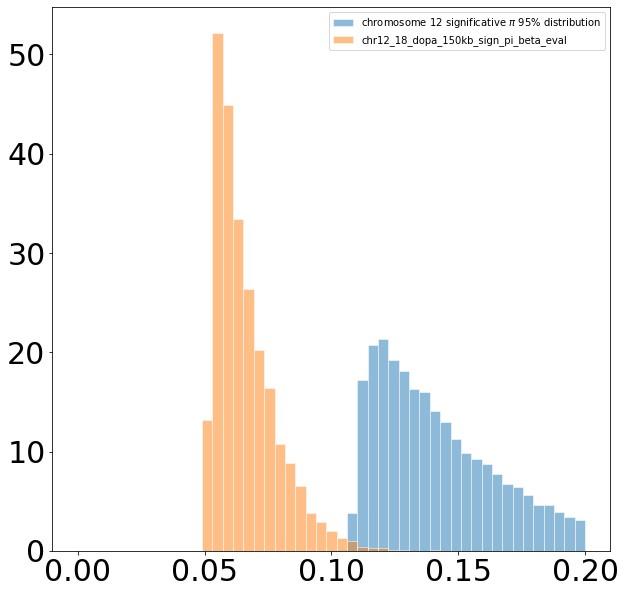

In [18]:
fig, ax = plt.subplots(1, figsize = (10,10))

bins_ = np.linspace(0,np.nanmax(0.2), 50)

A = ax.hist(chr12_dopa_150kb_sign_pi.flatten(), bins = bins_, density = True, edgecolor = 'white', label = "chromosome 12 significative $\pi$ 95% distribution", alpha = 0.5);
B = ax.hist(chr12_18_dopa_150kb_sign_pi_beta_eval.flatten(), bins = bins_, edgecolor = "white", density = True, label = "chr12_18_dopa_150kb_sign_pi_beta_eval", alpha = 0.5 )

ax.legend()

ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)


del fig, ax

# Check of the produced pi #

In [29]:
name_root

'dopa30_150kb_482x3'

In [32]:
chr12_iza_150kb_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/dopa30_150kb_482x3/PI2/PI2_chr12_dopa30_150kb_482x3.txt"))
chr18_iza_150kb_pi = squareform(np.loadtxt("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/dopa30_150kb_482x3/PI2/PI2_chr18_dopa30_150kb_482x3.txt"))
chr12_18_iza_150kb_pi  = np.load("/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/dopa30_150kb_482x3/PI2_inter_beta_evaluation/PI2_inter_chr12_chr18_dopa30_150kb_482x3.npy")

for i in [ chr12_iza_150kb_pi,   chr18_iza_150kb_pi] :
    np.fill_diagonal(i, np.nan)


np.array_equal(chr12_dopa_150kb_pi, chr12_iza_150kb_pi, equal_nan=True), np.array_equal(chr18_dopa_150kb_pi, chr18_iza_150kb_pi, equal_nan=True), np.array_equal(chr12_18_dopa_150kb_pi_beta_eval, chr12_18_iza_150kb_pi, equal_nan=True)

(True, True, True)

# coseg - $\pi$ correlations #

pearson			spearman
 0.6847487725695467 	 0.696795670856589
pearson			spearman
 0.6703254458838248 	 0.6584225969966389
pearson			spearman
 0.8276773056032305 	 0.7948394946817439


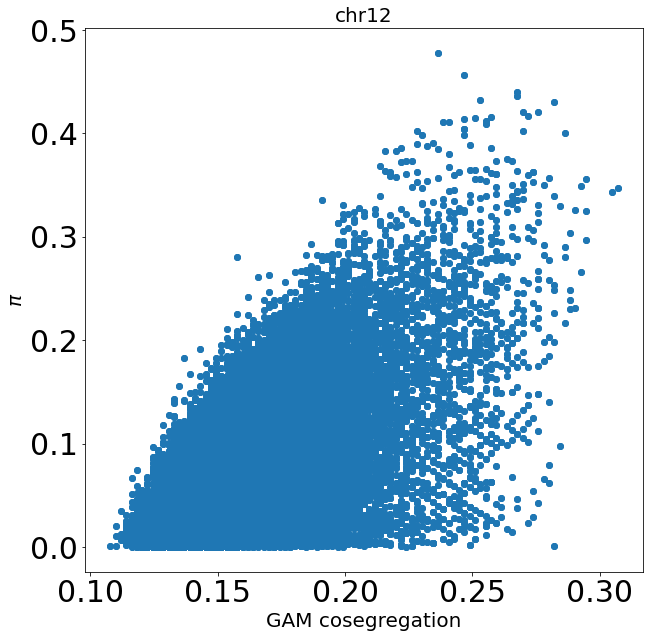

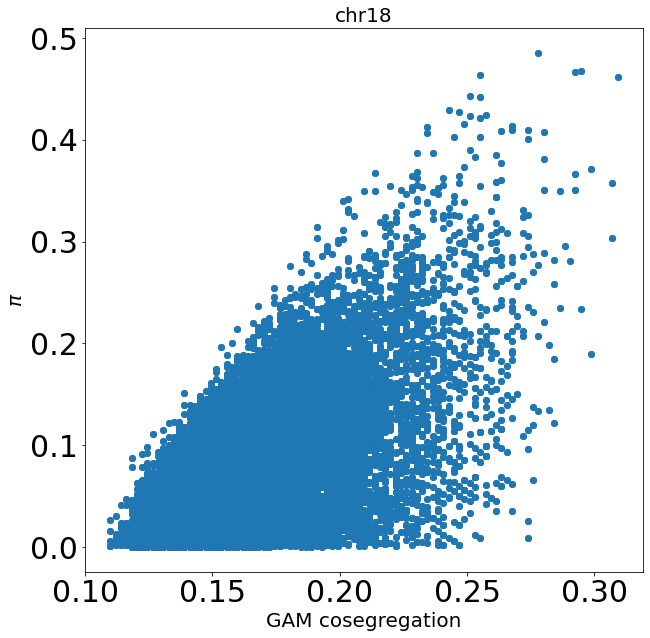

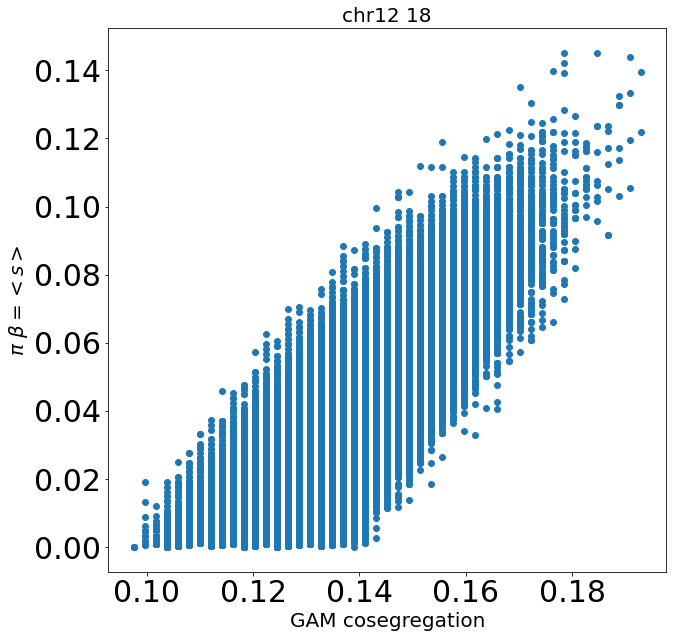

In [20]:
matrix_correlation(chr12_dopa_150kb_coseg, chr12_dopa_150kb_pi, verbose_print=True)
scatter_matrices(chr12_dopa_150kb_coseg, chr12_dopa_150kb_pi, x_label="GAM cosegregation", y_label="$\pi$", title="chr12");

matrix_correlation(chr18_dopa_150kb_coseg, chr18_dopa_150kb_pi, verbose_print=True)
scatter_matrices(chr18_dopa_150kb_coseg, chr18_dopa_150kb_pi, x_label="GAM cosegregation", y_label="$\pi$", title="chr18");

matrix_correlation(chr12_18_dopa_150kb_coseg, chr12_18_dopa_150kb_pi_beta_eval, verbose_print=True)
scatter_matrices(chr12_18_dopa_150kb_coseg, chr12_18_dopa_150kb_pi_beta_eval, x_label="GAM cosegregation", y_label="$\pi$ $\\beta = <s>$", title="chr12 18");

pearson			spearman
 0.705817268220154 	 0.6422786285062932
pearson			spearman
 0.7455415350952148 	 0.6694309000581209
pearson			spearman
 0.6362061628548493 	 0.579837129012595


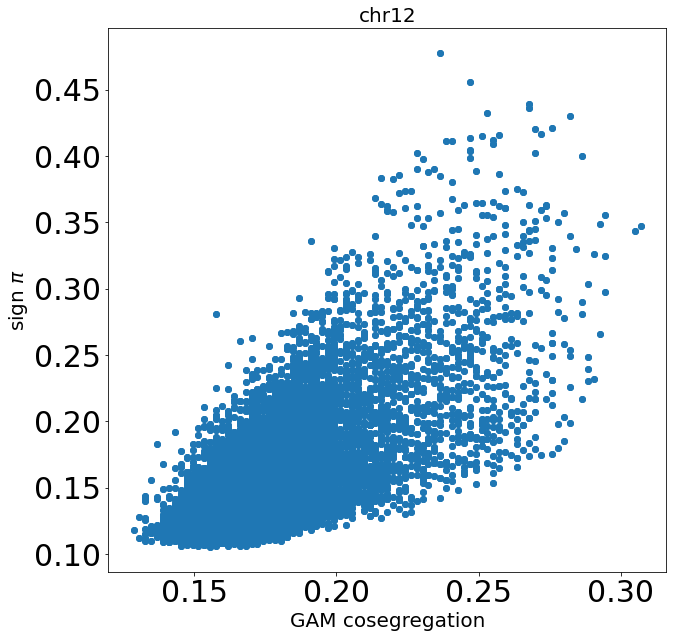

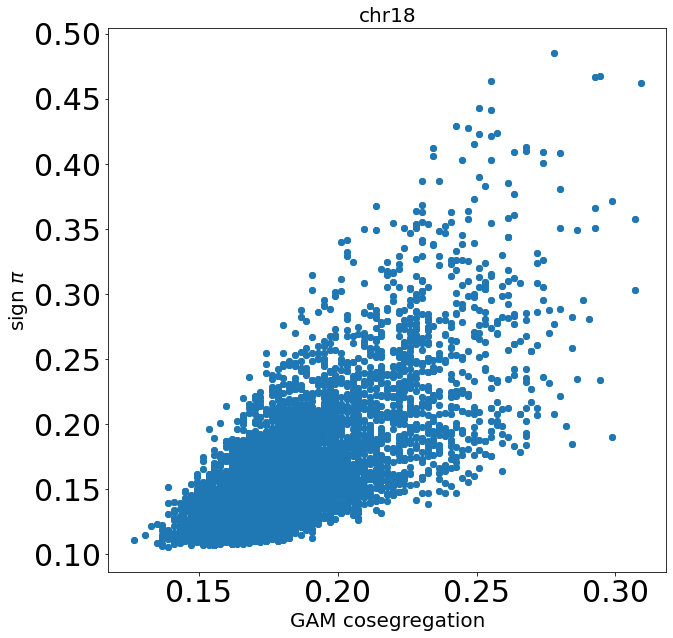

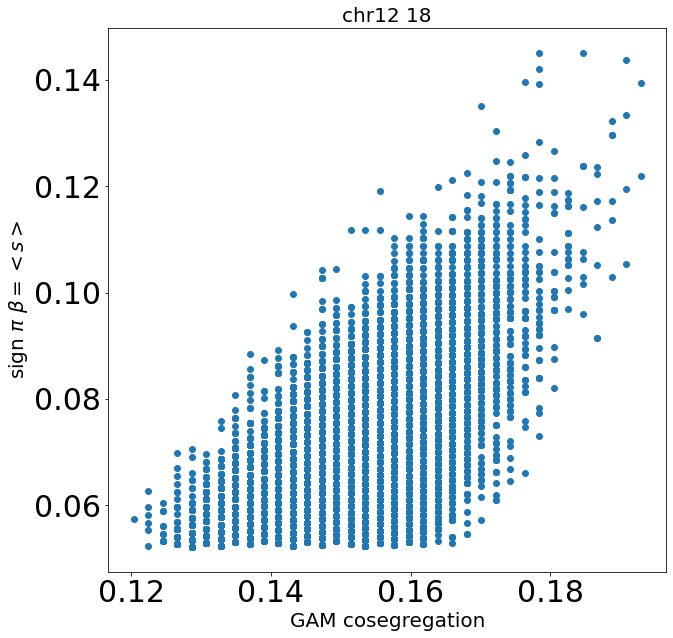

In [21]:
matrix_correlation(chr12_dopa_150kb_coseg, chr12_dopa_150kb_sign_pi, verbose_print=True)
scatter_matrices(chr12_dopa_150kb_coseg, chr12_dopa_150kb_sign_pi, x_label="GAM cosegregation", y_label="sign $\pi$", title="chr12");

matrix_correlation(chr18_dopa_150kb_coseg, chr18_dopa_150kb_sign_pi, verbose_print=True)
scatter_matrices(chr18_dopa_150kb_coseg, chr18_dopa_150kb_sign_pi, x_label="GAM cosegregation", y_label="sign $\pi$", title="chr18");

matrix_correlation(chr12_18_dopa_150kb_coseg, chr12_18_dopa_150kb_sign_pi_beta_eval, verbose_print=True)
scatter_matrices(chr12_18_dopa_150kb_coseg, chr12_18_dopa_150kb_sign_pi_beta_eval, x_label="GAM cosegregation", y_label="sign $\pi$ $\\beta = <s>$", title="chr12 18");

pearson			spearman
 0.7793551016189052 	 0.7010645508329373
pearson			spearman
 0.7937360810017702 	 0.7094616094006275
pearson			spearman
 0.6390175711466836 	 0.6173684487465962


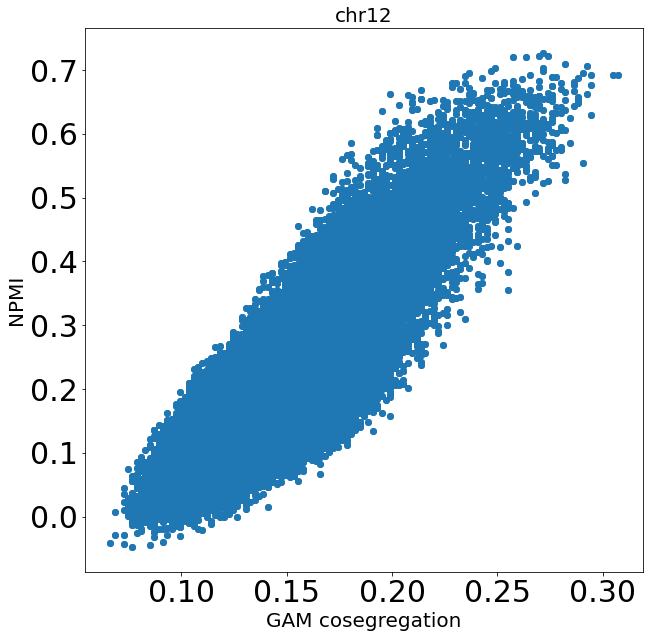

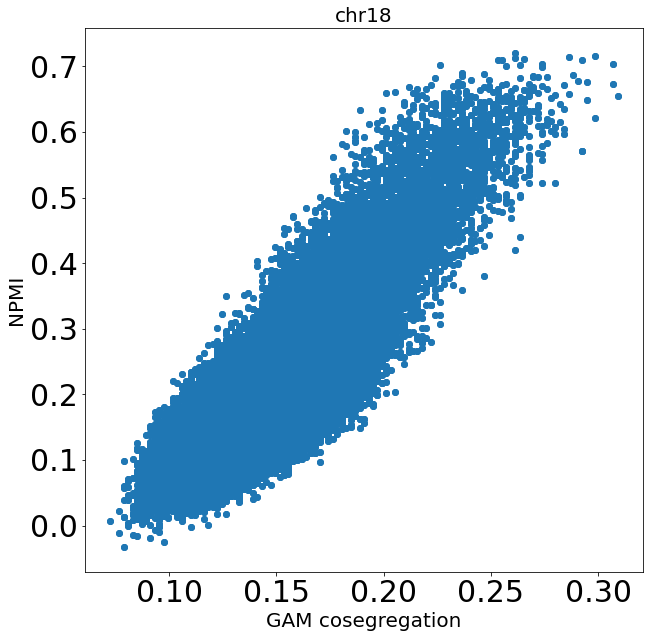

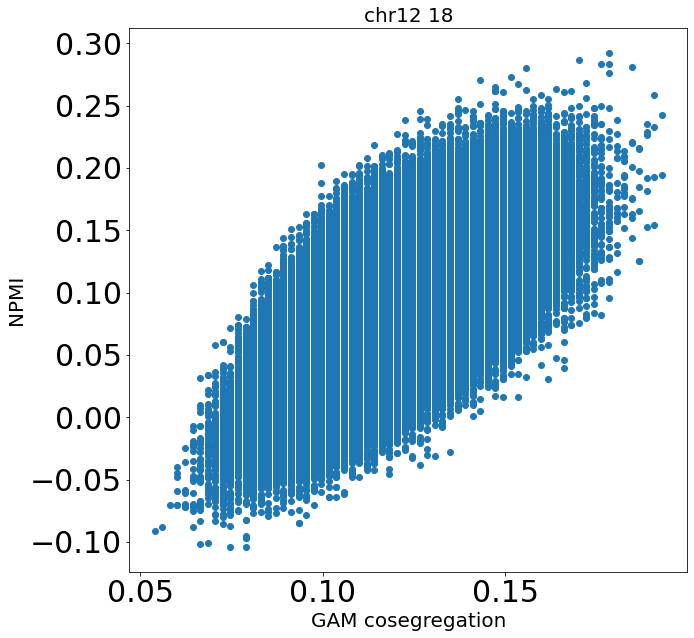

In [22]:
matrix_correlation(chr12_dopa_150kb_coseg, chr12_dopa_150kb_npmi, verbose_print=True)
scatter_matrices(chr12_dopa_150kb_coseg, chr12_dopa_150kb_npmi, x_label="GAM cosegregation", y_label="NPMI", title="chr12");

matrix_correlation(chr18_dopa_150kb_coseg, chr18_dopa_150kb_npmi, verbose_print=True)
scatter_matrices(chr18_dopa_150kb_coseg, chr18_dopa_150kb_npmi, x_label="GAM cosegregation", y_label="NPMI", title="chr18");

matrix_correlation(chr12_18_dopa_150kb_coseg, chr12_18_dopa_150kb_npmi, verbose_print=True)
scatter_matrices(chr12_18_dopa_150kb_coseg, chr12_18_dopa_150kb_npmi, x_label="GAM cosegregation", y_label="NPMI", title="chr12 18");


# F_i x F_j #

In [23]:
F_arr_genomewide_dopa_150kb = np.array([])

chr_list = ["chr1", "chr2", "chr3", "chr4",
                             "chr5", "chr6", "chr7", "chr8",
                             "chr9", "chr10", "chr11", "chr12",
                             "chr13", "chr14", "chr15", "chr16",
                             "chr17", "chr18", "chr19"]

for chr in chr_list:
    segregation_table = segregation_table_dopa_150kb[chr]["segregation_table"]
    F_arr = compute_tube_segregation_frequency(segregation_table)
    F_arr_genomewide_dopa_150kb = np.concatenate((F_arr_genomewide_dopa_150kb, F_arr))
    del F_arr

del segregation_table

In [24]:
F_i_outer_Fj_dopa_150kb = np.outer(F_arr_genomewide_dopa_150kb, F_arr_genomewide_dopa_150kb)
F_i_outer_Fj_dopa_150kb[F_i_outer_Fj_dopa_150kb == 0] = np.nan
np.fill_diagonal(F_i_outer_Fj_dopa_150kb, np.nan)

In [25]:
chr12_start, chr12_end, chr18_start, chr18_end = select_chromosomes_coordinates(12, 18, chr_windows_sizes)

pearson			spearman
 0.31496478922440596 	 0.2961328112560364
pearson			spearman
 0.8276773056032305 	 0.7948394946817439


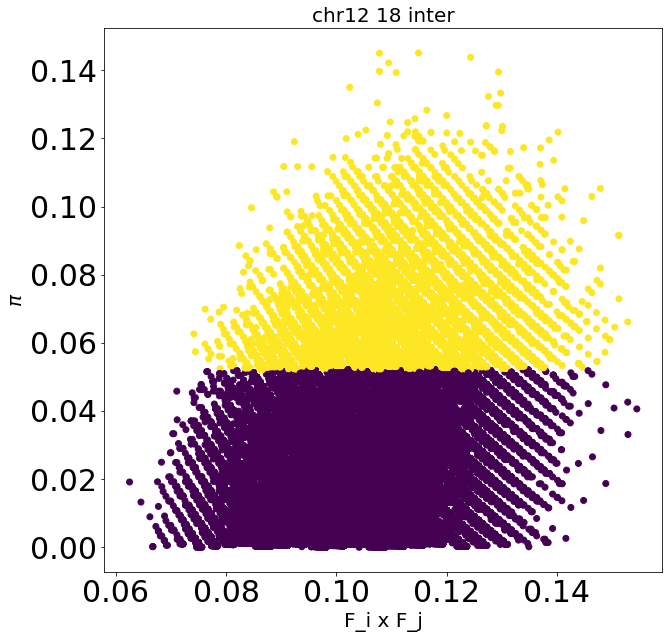

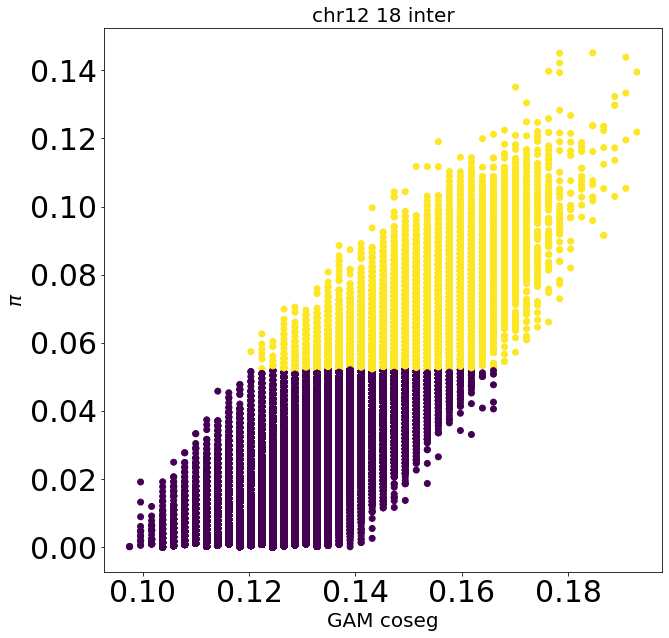

In [26]:
matrix_correlation(F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_dopa_150kb_pi_beta_eval, verbose_print=True)
scatter_matrices(F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_dopa_150kb_pi_beta_eval, x_label="F_i x F_j", y_label="$\pi$", title="chr12 18 inter", 
    colors = (chr12_18_dopa_150kb_sign_pi_beta_eval == chr12_18_dopa_150kb_sign_pi_beta_eval).astype(int) );

matrix_correlation(chr12_18_dopa_150kb_coseg, chr12_18_dopa_150kb_pi_beta_eval, verbose_print=True)
scatter_matrices(chr12_18_dopa_150kb_coseg, chr12_18_dopa_150kb_pi_beta_eval, x_label="GAM coseg", y_label="$\pi$", title="chr12 18 inter", 
    colors = (chr12_18_dopa_150kb_sign_pi_beta_eval == chr12_18_dopa_150kb_sign_pi_beta_eval).astype(int) );

## correlations of $F_i x F_j$ in intra chr12 ##

pearson			spearman
 0.6423070339977465 	 0.6868455546254203
pearson			spearman
 0.021817933144556906 	 0.02822077347251651
pearson			spearman
 0.2843639561160657 	 0.28155130460959393
pearson			spearman
 0.2843639561160657 	 0.28155130460959393


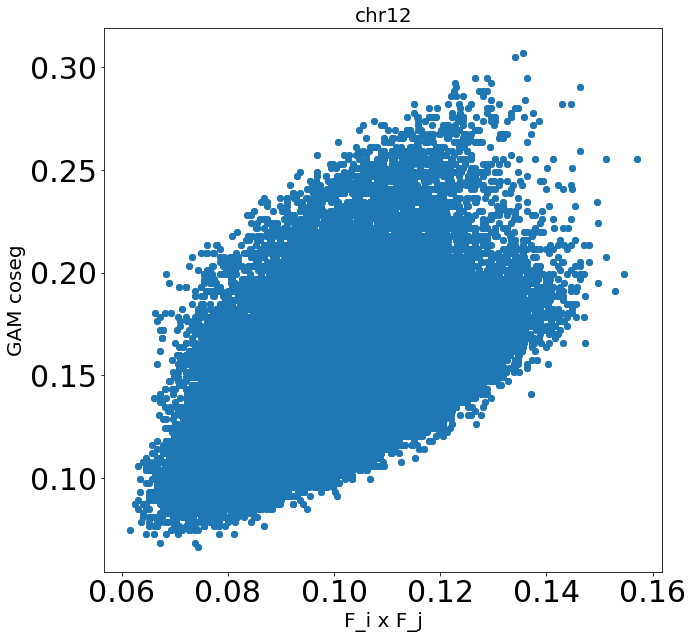

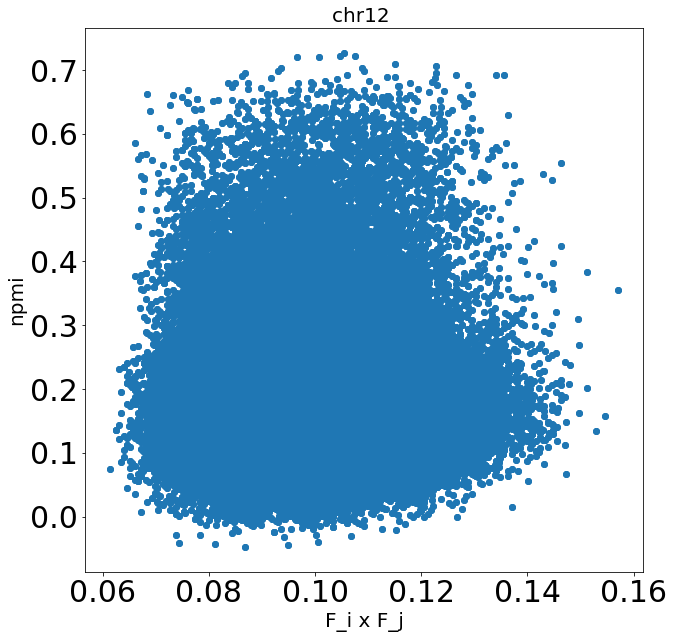

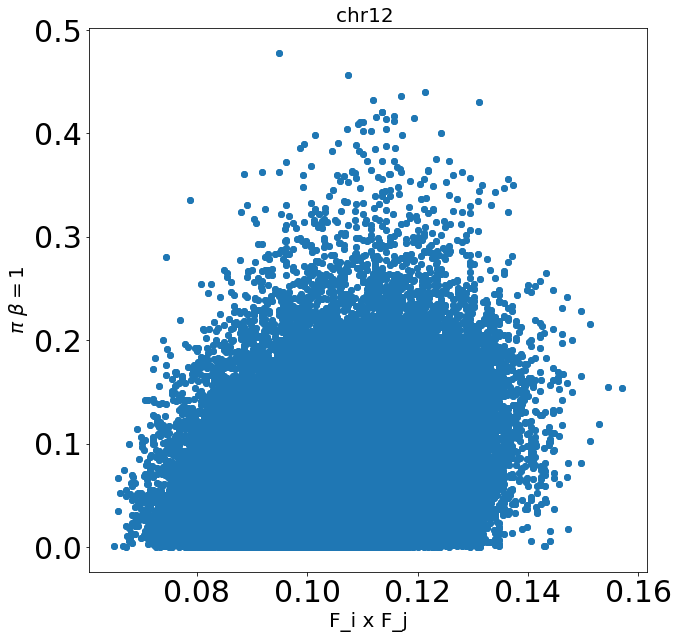

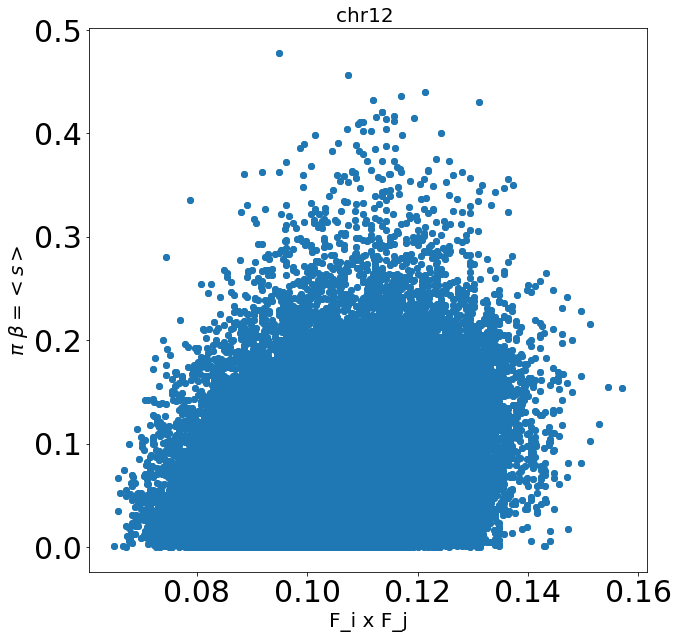

In [27]:
matrix_correlation( F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_dopa_150kb_coseg, verbose_print=True)
scatter_matrices(F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_dopa_150kb_coseg, x_label="F_i x F_j", y_label="GAM coseg", title="chr12");

matrix_correlation( F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_dopa_150kb_npmi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_dopa_150kb_npmi, x_label="F_i x F_j", y_label="npmi", title="chr12 ");

matrix_correlation( F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_dopa_150kb_pi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_dopa_150kb_pi, x_label="F_i x F_j", y_label="$\pi$ $\\beta = 1$", title="chr12 ");

matrix_correlation( F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_dopa_150kb_pi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_dopa_150kb_pi, x_label="F_i x F_j", y_label="$\pi$ $\\beta = <s>$", title="chr12 ");

## correlations of $F_i x F_j$ in inter chr12 18 ##

pearson			spearman
 0.783736736067453 	 0.771461511064914
pearson			spearman
 0.024365533970086634 	 0.02058465566003061


NameError: name 'chr12_18_dopa_150kb_pi_beta_1' is not defined

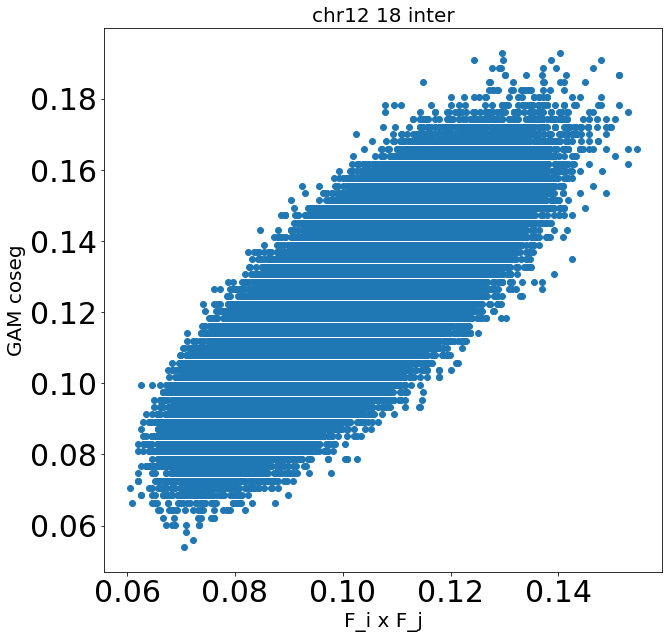

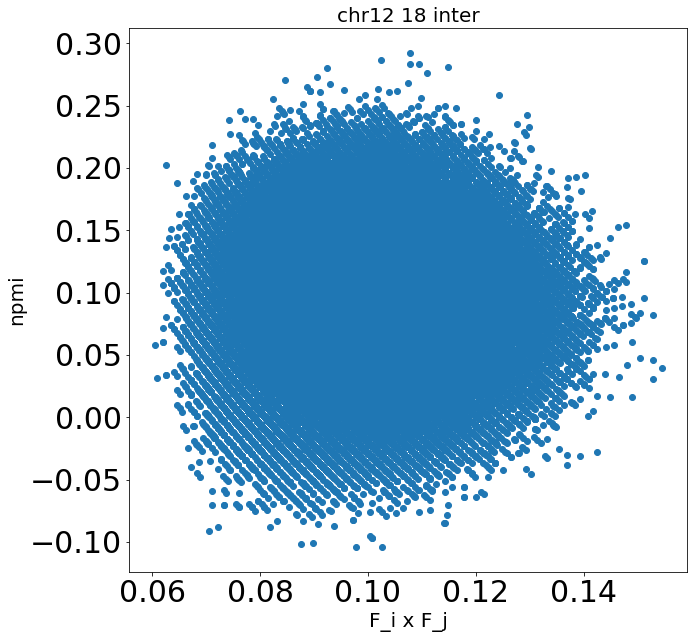

In [28]:
matrix_correlation( F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_dopa_150kb_coseg, verbose_print=True)
scatter_matrices(F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_dopa_150kb_coseg, x_label="F_i x F_j", y_label="GAM coseg", title="chr12 18 inter");

matrix_correlation( F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_dopa_150kb_npmi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_dopa_150kb_npmi, x_label="F_i x F_j", y_label="npmi", title="chr12 18 inter");

matrix_correlation( F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_dopa_150kb_pi_beta_1, verbose_print=True)
scatter_matrices(F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_dopa_150kb_pi_beta_1, x_label="F_i x F_j", y_label="$\pi$ $\\beta = 1$", title="chr12 18 inter");

matrix_correlation( F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_dopa_150kb_pi_beta_eval, verbose_print=True)
scatter_matrices(F_i_outer_Fj_dopa_150kb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_dopa_150kb_pi_beta_eval, x_label="F_i x F_j", y_label="$\pi$ $\\beta = <s>$", title="chr12 18 inter");

# ATAC #

In [ ]:
ATAC_mesc_R2_150kb_df = pd.read_csv("/home/federico/Università/Tesi_magistrale/Iza/ATAC/220125_ATAC150kbwindows_fragments.tsv", sep = "\t")
ATAC_mesc_R2_150kb_df.drop(['ESC_R1_ATACin150kb_overlaps', 'DN_R1_ATACin150kb_overlaps','DN_R2_ATACin150kb_overlaps'], axis = 1,inplace = True)

In [ ]:
resolution = 150E3

ATAC_mesc_R2_chr12_150kb_df = ATAC_mesc_R2_150kb_df.loc[ATAC_mesc_R2_150kb_df['chrom'] == "chr12"]

ATAC_mesc_R2_chr18_150kb_df = ATAC_mesc_R2_150kb_df.loc[ATAC_mesc_R2_150kb_df['chrom'] == "chr18"]

chrA_lenght = ATAC_mesc_R2_chr12_150kb_df.shape[0]
chrB_lenght = ATAC_mesc_R2_chr18_150kb_df.shape[0]

ticks = [0, chrA_lenght, chrA_lenght + chrB_lenght]
ticks_labels = ["0", str(int(np.ceil(chrA_lenght * resolution / 1E6))) + "Mb", str(int(np.ceil(chrB_lenght * resolution / 1E6))) + "Mb" ]



ATAC_mesc_R2_chr12_18_150kb_df = pd.concat([ATAC_mesc_R2_chr12_150kb_df, ATAC_mesc_R2_chr18_150kb_df])
ATAC_mesc_R2_chr12_18_150kb_df = ATAC_mesc_R2_chr12_18_150kb_df.reset_index(drop = True).reset_index(drop = False)

fig, ax = plt.subplots(1, figsize = (10,2))
ax.plot(ATAC_mesc_R2_chr12_18_150kb_df['index'],ATAC_mesc_R2_chr12_18_150kb_df['ESC_R2_ATACin150kb_overlaps'] )
ax.set_xticks(ticks);
ax.set_xticklabels(ticks_labels);
ax.set_xlim(0,chrA_lenght + chrB_lenght );

In [ ]:
ATAC_mesc_R2_chr12_150kb_array = ATAC_mesc_R2_chr12_150kb_df['ESC_R2_ATACin150kb_overlaps'].values
ATAC_mesc_R2_chr18_150kb_array = ATAC_mesc_R2_chr18_150kb_df['ESC_R2_ATACin150kb_overlaps'].values

ATAC_mesc_R2_chr12_18_150kb_array = ATAC_mesc_R2_chr12_18_150kb_df['ESC_R2_ATACin150kb_overlaps'].values
ATAC_outer = np.outer(ATAC_mesc_R2_chr12_18_150kb_array, ATAC_mesc_R2_chr12_18_150kb_array).astype(float)
ATAC_outer[ATAC_outer == 0] = np.nan

ATAC_outer_chr12_18 = np.outer(ATAC_mesc_R2_chr12_150kb_array, ATAC_mesc_R2_chr18_150kb_array).astype(float)
ATAC_outer[ATAC_outer == 0] = np.nan

In [ ]:
matrix_correlation( chr12_18_dopa_150kb_pi_beta_eval, ATAC_outer_chr12_18, verbose_print=True)
scatter_matrices(chr12_18_dopa_150kb_pi_beta_eval, ATAC_outer_chr12_18, x_label="ATAC outer", y_label="$\pi$ $\\beta = <s>$", title="chr12 18 inter");


In [ ]:
ATAC_outer_chr12_18.shape

In [ ]:
chr12_18_dopa_150kb_pi_beta_eval.shape